## Task #10
- This is Task 10 overall and Task 1 of Week 5
### Task # 01
- This notebook will be lengthy as this task will consist of working on different datasets

In [1]:
#importing libraries , some libraries might be imported later based on the use case
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Task # 1.1:
- Handling Missing Data in Titanic Dataset
- Task :Identify and handle missing values in the Titanic dataset. Experiment with different
strategies such as mean/median imputation, mode imputation, and dropping rows/columns.
- Dataset: Titanic Dataset

In [5]:
#importing the data set from local machine
file_path = 'titanic.csv'
titanic_df = pd.read_csv(file_path)
#check dataset 
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
#checking if there are any null values , we will check the null values if they exist we will also calculate its percentage
titanic_df.isnull().sum()/titanic_df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- if we analyze the above output the Cabin has Null values more than 50% so its better to drop , but looking at Age and Embarked we can opt for imputing technique
- Lets first check the nature of data , the age has numerical data so lets look at its distribution and Embarked is categorical so we will use Mode for it

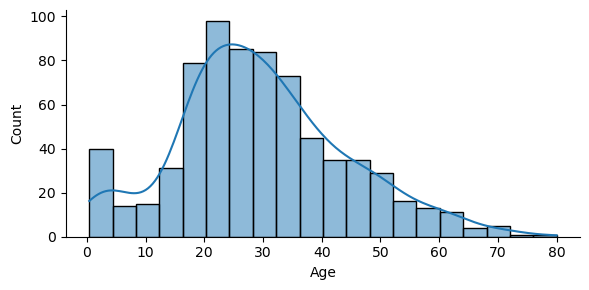

In [7]:
#distribution of Age 
sns.displot(titanic_df['Age'], height=3, aspect=2, kde=True)
plt.show()

- we can see that the distribution is not in skew format , so we will use mean for age , while for Embarked we will use Mode

In [8]:
#creating copy of dataset for altering purpose

titanic_df_2 = titanic_df.copy()

#dropping Cabin column
titanic_df.drop('Cabin', axis=1,inplace=True)

# Replacing with Mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# Replacing with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])


In [9]:
#verification of NULL values
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- Based on the above output we see that we have successfully handled the Null values in the give dataset

#### Task 1.2:
Encoding Categorical Variables in a Car Evaluation Dataset
- Task: Encode categorical variables in the Car Evaluation dataset using one-hot encoding
and label encoding. Compare the results.
- Dataset: Car Evaluation Dataset

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# Converting features to pandas DataFrame
car_eva_df = pd.DataFrame(car_evaluation.data.features, columns=car_evaluation.feature_names)
car_eva_df['Target'] = car_evaluation.data.targets

In [11]:
#checking the data set
car_eva_df.head(2)

,buying,maint,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


### Label Encoding

In [12]:
#for our task we will use target variable and then analyze the outputs of both encoding techniques
#importing necessary library
from sklearn.preprocessing import LabelEncoder

Y = car_eva_df['Target']
# Applying label encoding

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
print("Target Before encoding")
print(Y.value_counts())
print("Target After encoding")
print(set(Y_encoded))

#now lets create a dataframe with label encoding 
label_car_df = car_eva_df.copy() #creating copy
label_car_df['Target'] = Y_encoded
label_car_df.head(3)

Target Before encoding
Target
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
Target After encoding
{0, 1, 2, 3}


,buying,maint,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,2
1,vhigh,vhigh,2,2,small,med,2
2,vhigh,vhigh,2,2,small,high,2


### One Hot Encoding

In [13]:
# Importing necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Assuming car_eva_df is your original DataFrame and Y is the target variable
Y = car_eva_df['Target']

# Reshaping target variable to a 2D array (necessary for OneHotEncoder)
Y = np.array(Y).reshape(-1, 1)

# Applying one-hot encoding
one_hot_encoder = OneHotEncoder()
Y_H_encoded = one_hot_encoder.fit_transform(Y)

# Converting the encoded target to a DataFrame for better visualization
encoded_columns = one_hot_encoder.get_feature_names_out(['Target'])
one_hot_encoded_df = pd.DataFrame(Y_H_encoded.toarray(), columns=encoded_columns)

# Ensuring the indexes match
one_hot_encoded_df.index = car_eva_df.index

# Concatenating the one-hot encoded DataFrame with the original DataFrame
car_eva_df_one_hot = pd.concat([car_eva_df.drop('Target', axis=1), one_hot_encoded_df], axis=1)

# Displaying the first few rows of the updated DataFrame
print("\nUpdated DataFrame with One-Hot Encoded Target:")
car_eva_df_one_hot.head()


Updated DataFrame with One-Hot Encoded Target:


,buying,maint,doors,persons,lug_boot,safety,Target_acc,Target_good,Target_unacc,Target_vgood
0,vhigh,vhigh,2,2,small,low,0.0,0.0,1.0,0.0
1,vhigh,vhigh,2,2,small,med,0.0,0.0,1.0,0.0
2,vhigh,vhigh,2,2,small,high,0.0,0.0,1.0,0.0
3,vhigh,vhigh,2,2,med,low,0.0,0.0,1.0,0.0
4,vhigh,vhigh,2,2,med,med,0.0,0.0,1.0,0.0


### Analysis of both Encoding:
- The label encoding assign the numerical values to different categories within the same variable(Column,Attribute) While the Hot encoding technique construct different columns for different categories with numerical true(1) and false(0).
- The size of dataset remains the same in label encoding while it is expanded in hot encoding technique
- Nominal Data: If the target variable is nominal, where the order of the categories does not matter, one-hot encoding is suitable.
- Ordinal Data: If the target variable has ordinal data (e.g., "low", "medium", "high"), where the order of the categories matters, label encoding is appropriate. But the order of indexing is based on the unique categories alphabetical order(high->0 , medium->2 , low->1),Also Capital letters have more priority(high->1 , Medium->0 , low->2)
- One-Hot Encoding converts each category into a binary vector, where only one bit is 1 (hot) and the rest are 0 (cold)
- Each encoding technique has its advantages and limitations. Label Encoding is simple but can introduce false ordinal relationships. One-Hot Encoding avoids ordinal relationships but can lead to high-dimensional feature spaces.

### Task # 1.3
Scaling Features in the Wine Quality Dataset
- Task: Apply normalization and standardization to the features in the Wine Quality dataset.
Analyze how scaling affects the distribution of data.
- Dataset: Wine Quality Dataset

In [48]:
#importing the dataset 
file_path = 'winequality-red.csv'
wine_df = pd.read_csv(file_path)

wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


#### About Feature Scaling:
- When we have a dataset within which the numerical values belong to different ranges, like maybe some colum values are in 10's other might be in millions or thousands so this may effect the ML Model performance , and it may produce some biasness due to which we might end up with inaccurate and undesired result so to overcome this issue and make the values in a suitable and same range so we apply feature scalling , There are 3 common methods of feature scaling.
- **Simple Feature Scaling** **x_new = x_old/x_max**
- **Standardization** which is also referred as z-score -> **x_stand = x-mean(x)/std(x)** 
- **Normalization** also called min-max -> **x_new = (x-x_min)/(x_max-x_min)**
- fit the feature scalling method on traing data 

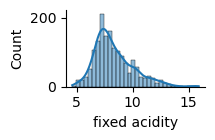

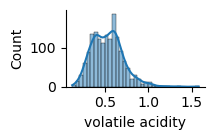

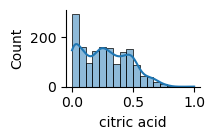

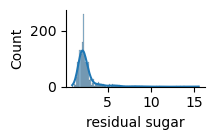

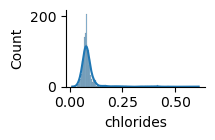

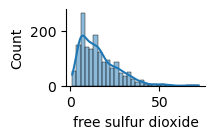

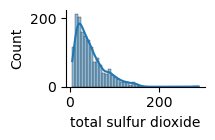

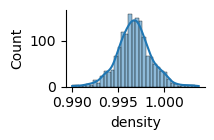

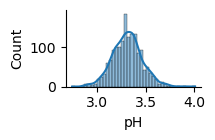

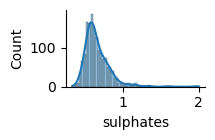

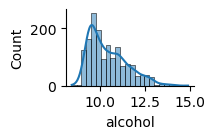

In [33]:
#lets have a look at the distribution of features
#distribution of data can also play a vital role in determinig which feature scaling should be used
X = wine_df.iloc[:,0:11]
Y = wine_df.iloc[:,11:12]

col_list = X.columns

for i in col_list:
    sns.displot(X[i],height = 1.5 , aspect = 1.5 , kde = True)
    

#### How to do Standardization?

In [46]:
#this is how we can standardize our data
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()

X_standard = Standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard,columns=X.columns)
X_standard.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


#### How to do Normalization?

In [45]:
#Normalization is done as follows
#importing the necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Normalizing the feature columns
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Converting  the normalized data back to a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


### Task # 1.4:
. Handling Outliers in the Boston Housing Dataset
- Task: Identify and handle outliers in the Boston Housing dataset using techniques like
Z-score, IQR, and visualization methods.
- Dataset: Boston Housing Dataset

In [64]:
#importing the dataset
file_path = 'HousingData.csv'
House_df = pd.read_csv(file_path)

House_df.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [66]:
#now lets check for some null values in the dataset 
House_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

- There exist some null value columns but for practice purpose we are not gonna get into depth of how to deal with null values in this task so we will just replace the null value with the mean(average) values
- For CHAS we will use mode

In [77]:
# List of column names to process
columns = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']

# Iterate through the list of columns
for column in columns:
    # Calculate the average value for the current column
    average_value = House_df[column].astype('float').mean(axis=0)
    
    # Replace NaN values with the average value
    House_df[column] = House_df[column].replace(np.nan, average_value)

# Replacing with mode
House_df['CHAS'] = House_df['CHAS'].fillna(House_df['CHAS'].mode()[0])

#verification of NULL values 
House_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Visualization Method
- Box plot is recommended to identify outliers , the values which will be seen out of the maximum and minimum ranges those will be outliers

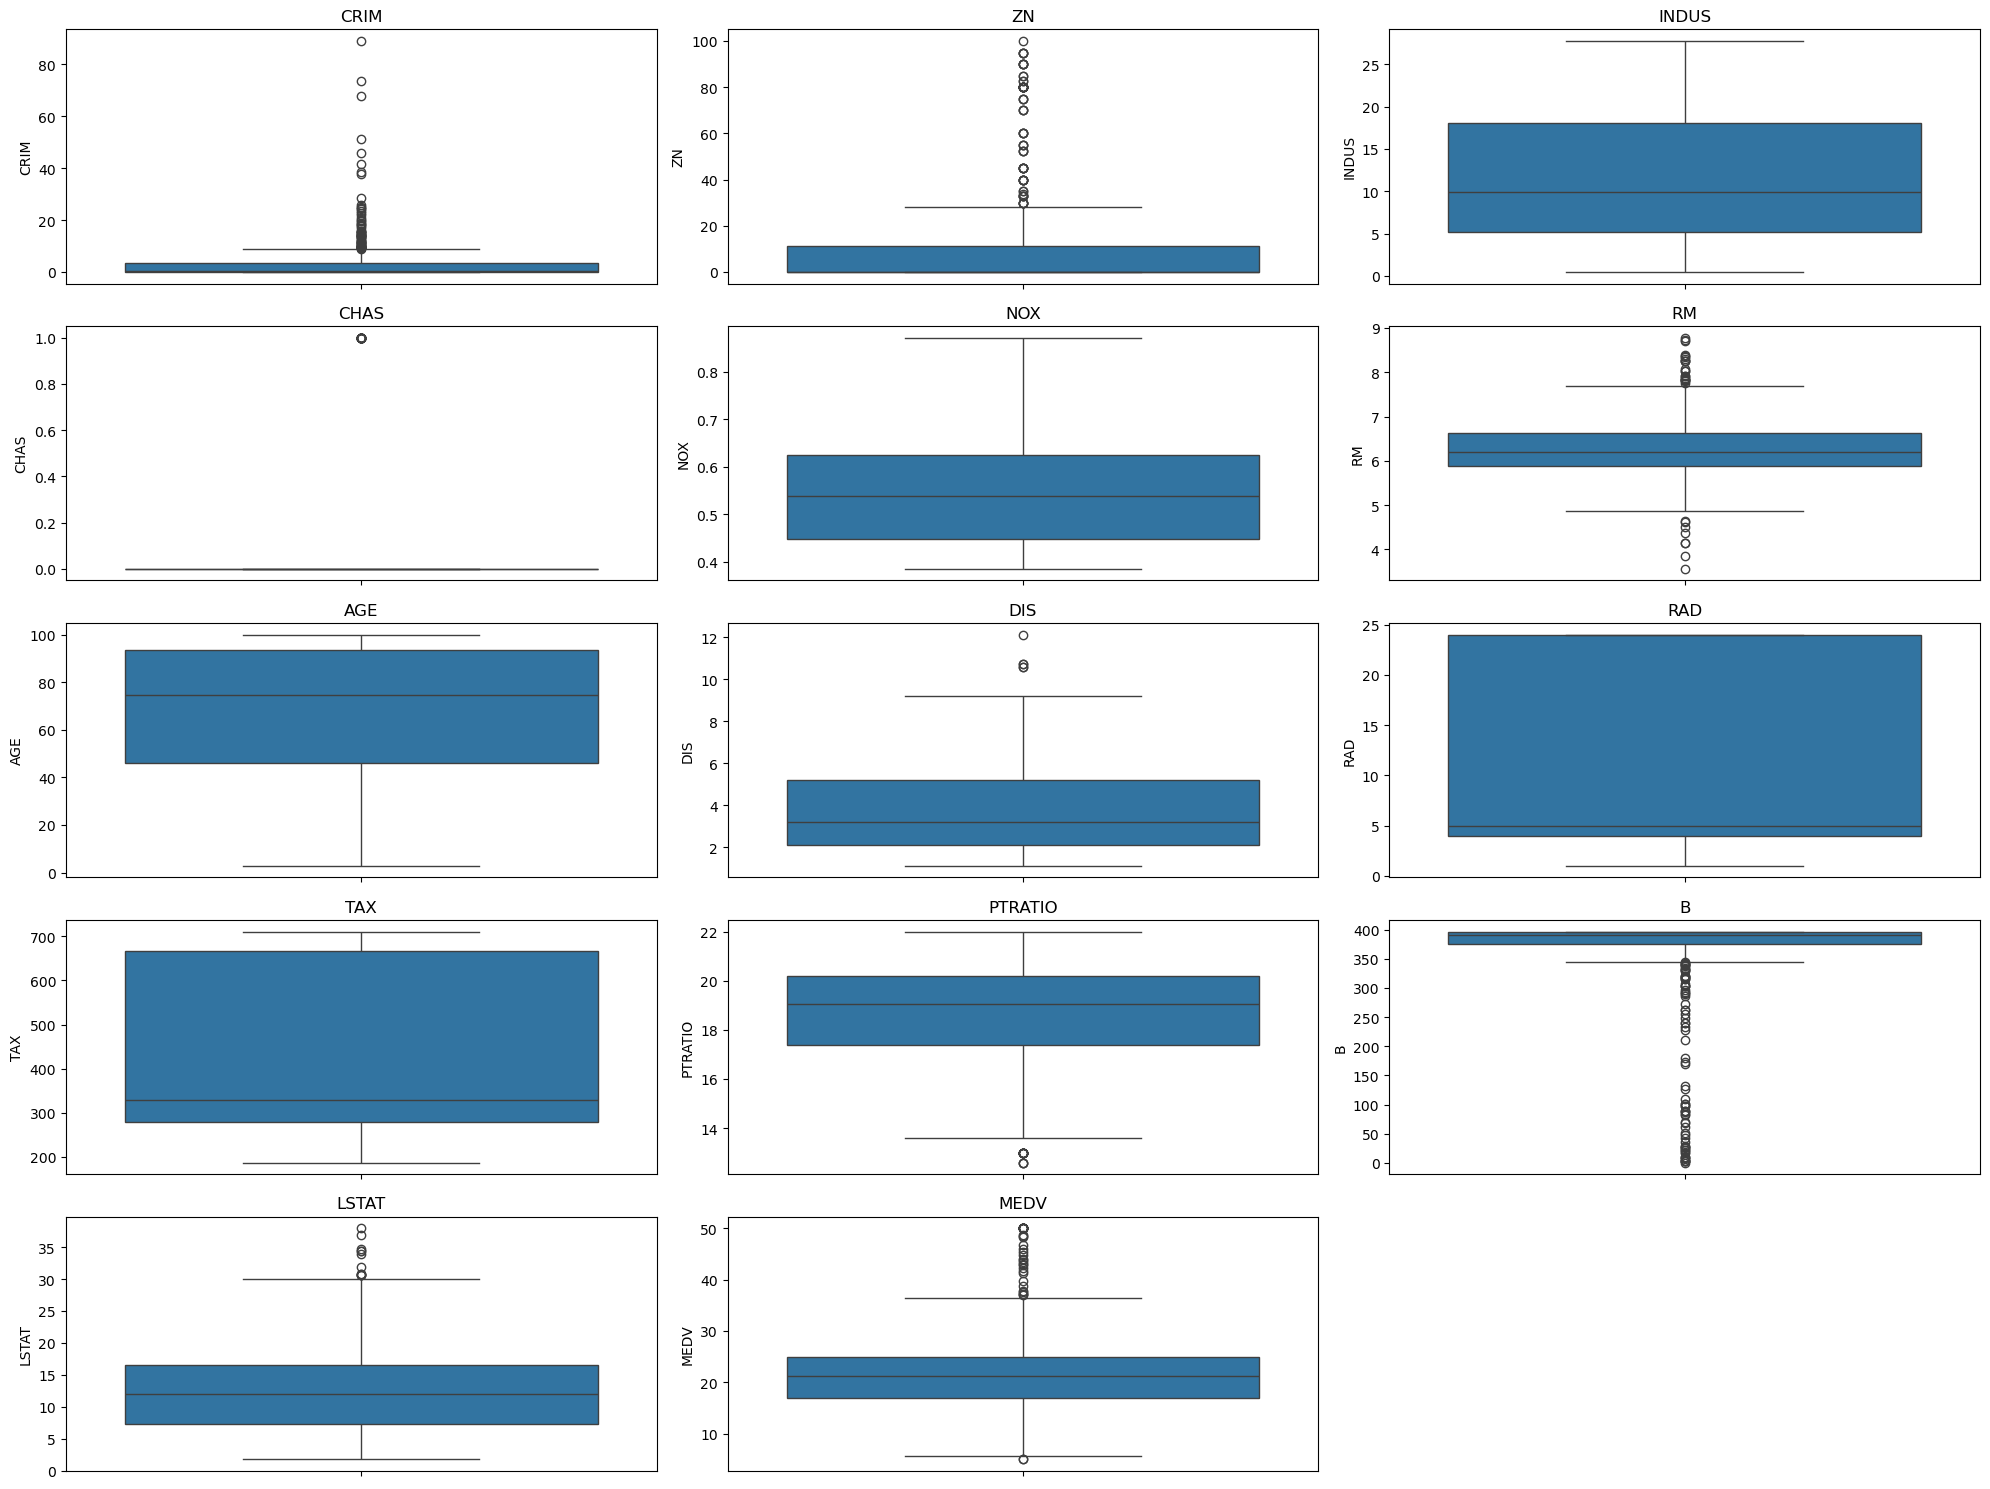

In [76]:
#visualization Method
#box plot can be very useful in identifying the outliers so lets visualize it 
col_list = House_df.columns

# Create box plots for each feature
plt.figure(figsize=(20, 15))
for i, col in enumerate(col_list, 1):
    plt.subplot(5, 3, i)  # 5 rows, 3 columns, i is the index of the plot
    sns.boxplot(y=House_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

- As we can obsereve from the above visualizations that outliers are clearly identified

#### Z-score method
- The Z-score method calculates the number of standard deviations an observation is away from the mean. Observations with a Z-score greater than 3 or less than -3 are typically considered outliers.

In [72]:
#z-score method
from scipy import stats

z_scores = stats.zscore(House_df)
outliers_z = (np.abs(z_scores) > 3)
print(outliers_z.sum())

CRIM        8
ZN         28
INDUS       0
CHAS       34
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       6
MEDV        0
dtype: int64


#### IQR method
- The IQR (Interquartile Range) method calculates the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Observations with values more than 1.5 times the IQR away from Q3 or Q1 are considered outliers.

In [102]:
# #IQR method
Q1 = House_df.quantile(0.25)
Q3 = House_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((House_df < (Q1 - 1.5 * IQR)) | (House_df > (Q3 + 1.5 * IQR))).sum()

outliers_iqr

CRIM       64
ZN         68
INDUS       0
CHAS       34
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT      12
MEDV       40
dtype: int64

#### Handling the outliers
1. Remove outliers ( deletion )One simple approach is to remove the outliers from the dataset. This method is effective when the outliers are few and the dataset is large.
2. Transform outliers ( transformation )Transforming outliers can reduce their impact on the model. Common transformations include:log,squaroot,standardization
3. Winsorize outliers ( winsorization )Winsorization replaces outliers with a value closer to the median, such as the 95th percentile.
4. Impute outliers ( imputation )Imputation replaces outliers with a statistical value, such as the mean or median of the feature.
- While there are some other advance methods for handling outliers aswell
- For the simplicity of this task we will use the deletion method and verify the result

In [101]:
#deletion
df_clean = House_df[~outliers_z] #removing on the basis of z-score

In [107]:
#verification
z_scores = stats.zscore(df_clean)
outliers_z = (np.abs(z_scores) > 3)
print(outliers_z.sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Task # 1.5:
 Data Imputation in  Dataset
- Task: Handle missing values i  dataset using advanced imputation
techniques like KNN imputation and MICE.
- Dataset: Retail Sales Dataset

In [29]:
#importing the dataset
file_path = 'HousingData.csv'
House_df = pd.read_csv(file_path)
House_df.isnull().sum()/retail_df.shape[0]*100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

#### K-Nearest Neighbors (KNN) Imputation: 
- KNN imputation is a popular technique that uses the concept of similarity to impute missing values. The idea is to find the k most similar instances (nearest neighbors) to the instance with missing values and use their values to impute the missing values.

In [40]:
# Replacing with mode
House_df['CHAS'] = House_df['CHAS'].fillna(House_df['CHAS'].mode()[0])

from sklearn.impute import KNNImputer

# Creating a KNN imputer with k=5
#k=5 refers to the number of nearest neighbors to consider when imputing missing values.
imputer = KNNImputer(n_neighbors=5)

X = House_df.iloc[:,0:13]

# Fitting the imputer on the dataset and transform the data
X_imputed = imputer.fit_transform(X)

# Converting the result back to a DataFrame for easier inspection
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

#verification
X_imputed_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Multiple Imputation by Chained Equations (MICE): 
- MICE is a multiple imputation technique that uses a combination of regression models and Bayesian inference to impute missing values. MICE is particularly useful when dealing with complex datasets and multiple types of missing values.

In [49]:
#importing necessary libraries , we ca also use fancyimpute library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Selecting features for imputation
X = House_df.iloc[:, 0:13] 

# Initializing the Iterative Imputer (MICE)
mice_imputer = IterativeImputer(max_iter=10, random_state=0)  # max_iter: Number of imputation rounds

# Fitting the imputer and transform the dataset
X_imputed = mice_imputer.fit_transform(X)

# Converting the result back to a DataFrame for easier inspection
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

X_imputed_df.isnull().sum()



CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

**The Remaining Parts of this task is in the next part (Part 2)**